## Example 3 divergence and overflow
$h(x)=x^5 - 2x^4 + 2$

In [1]:
from matplotlib import pyplot as plt
import  numpy as np
%matplotlib inline

In [2]:
x_values = np.linspace(-2, 2, 1000)

def h(x):
    return (x**5) - 2*(x**4) + 2

def dh(x):
    return 5*(x**4) - 8*(x**3) 

In [17]:
from typing import Union, Tuple
def gradient_desc(
    derivative_func, 
    initial_guess: Union[int, float], 
    learning_rate: Union[int, float], 
    precision: Union[int, float] = 0.0001,
    max_steps: int = 300
    ) -> Tuple[float, list, list]:
    """
    Gradient descent as a function
    @param derivative_func: A derivative function
    @param initial_guess: The initial guess
    @param learning_rate: The step multiplier/learning rate
    @param precision: The precision at which point to break the loop
    @param precision: The maximum allowed steps in the loop
    @return: The minimum for x the derivative, a list of x values in the derivative, and a list of slopes
    """
    new_x = initial_guess
    x_values = [new_x]
    slopes = [derivative_func(new_x)]

    for n in range(max_steps):
        prev_x = new_x
        gradient = derivative_func(prev_x)

        # Stepping down the slope
        new_x = prev_x - (learning_rate * gradient)
        
        # Add our slope and x values into their lists
        x_values.append(new_x)
        slopes.append(derivative_func(new_x))

        step_size = abs(new_x - prev_x)
        if step_size < precision:
            break

    return new_x, x_values, slopes

Local Minimum occurs at -2071072.4470816324
Cost at this minimum -3.810455326061589e+31
Number of steps 71


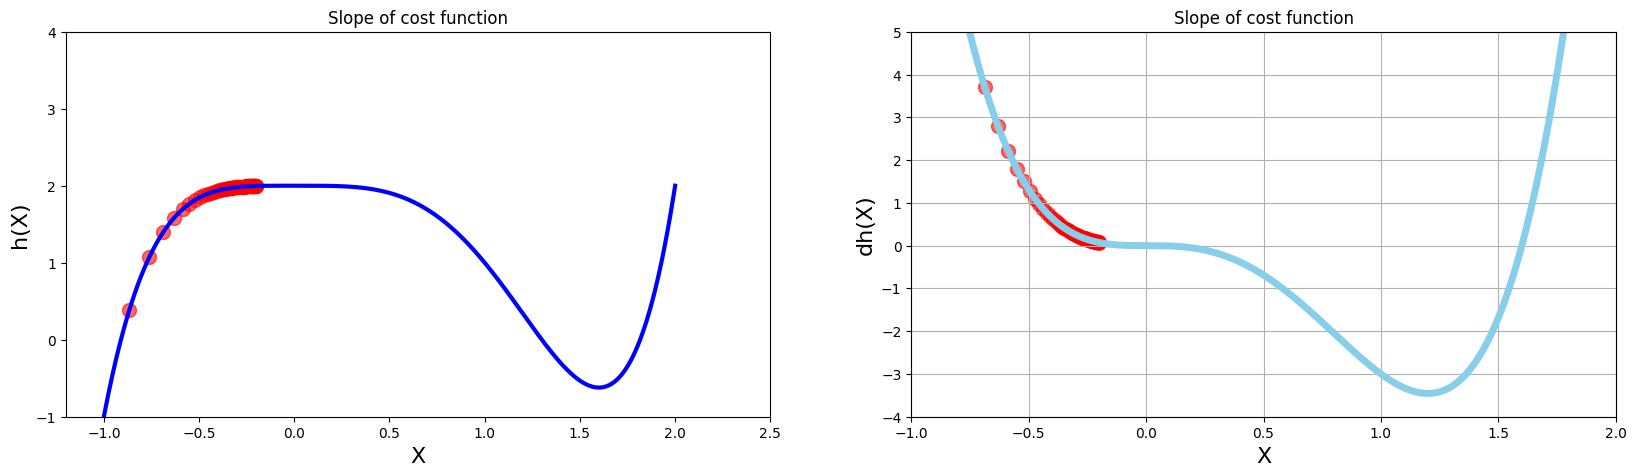

In [26]:
local_min, list_x, deriv_list = gradient_desc(derivative_func=dh, initial_guess=-0.2, learning_rate=0.02, max_steps=70)
print(f"Local Minimum occurs at {local_min}")
print(f"Cost at this minimum {h(local_min)}")
print(f"Number of steps {len(list_x)}")

# superimpose gradient descent on Cost function plot and slope of the cost function
plt.figure(figsize=[20,5])


# First chart: Cost function
plt.subplot(1, 2, 1)
plt.title("Slope of cost function")
plt.xlim([-1.2,2.5])
plt.ylim([-1, 4])
plt.xlabel("X", fontsize=16)
plt.ylabel("h(X)", fontsize=16)
plt.plot(x_values, h(x_values), color="blue", linewidth=3)

plt.scatter(list_x, h(np.array(list_x)), color="red", s=100, alpha=0.6)

# Second chart of the derivative
plt.subplot(1,2,2)
plt.title("Slope of cost function")
plt.grid()
plt.xlim([-1,2])
plt.ylim([-4,5])
plt.xlabel("X", fontsize=16)
plt.ylabel("dh(X)", fontsize=16)
plt.plot(x_values, dh(x_values), color="skyblue", linewidth=5)

plt.scatter(list_x, deriv_list, color="red", s=100, alpha=0.6)

plt.show()